In [1]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
batch_size = 32
num_classes = 10
epochs = 10
num_predictions = 20

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
print(x_train[0])
print(y_train[0])
image_dictionary={0:'airplane',1:'automobile',2:'bird',3:'cat',
       4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
print(image_dictionary[float(y_train[0])])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ..., 
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ..., 
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ..., 
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ..., 
 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ..., 
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ..., 
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ..., 
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]
frog


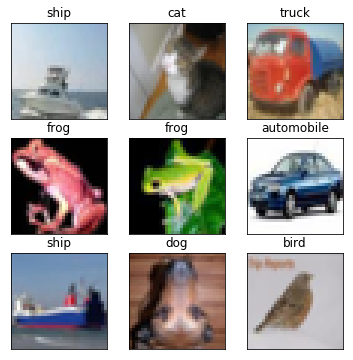

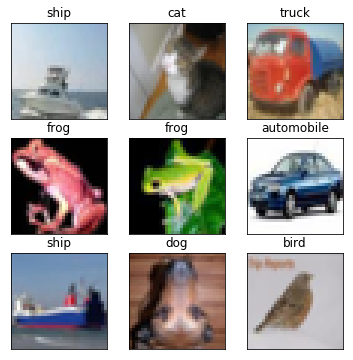

In [4]:
fig=plt.figure()
fig.set_size_inches(6,6)
for i in range(100,109):
    plt.subplot(3,3,i-99)
    plt.imshow(x_train[i],cmap='binary')
    plt.title(image_dictionary[float(y_train[i])])
    plt.xticks([])
    plt.yticks([])
    
fig

In [5]:
print(y_train[0])
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

[6]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [6]:
# 最佳化隨機梯度下降
# opt = keras.optimizers.SGD(lr=0.01, decay=1e-6,
#                            momentum=0.9, nesterov=True)
#使用Adam optimizer
opt = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
# 訓練模型 
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [7]:
history=model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 245s 5ms/step - loss: 1.5039 - acc: 0.4539 - val_loss: 1.1307 - val_acc: 0.6006
Epoch 2/10
50000/50000 [==============================] - 243s 5ms/step - loss: 1.0908 - acc: 0.6123 - val_loss: 0.9341 - val_acc: 0.6710
Epoch 3/10
50000/50000 [==============================] - 240s 5ms/step - loss: 0.9458 - acc: 0.6653 - val_loss: 0.8730 - val_acc: 0.6885
Epoch 4/10
50000/50000 [==============================] - 240s 5ms/step - loss: 0.8495 - acc: 0.7022 - val_loss: 0.7369 - val_acc: 0.7428
Epoch 5/10
50000/50000 [==============================] - 246s 5ms/step - loss: 0.7983 - acc: 0.7181 - val_loss: 0.7400 - val_acc: 0.7431
Epoch 6/10
50000/50000 [==============================] - 245s 5ms/step - loss: 0.7496 - acc: 0.7377 - val_loss: 0.7215 - val_acc: 0.7499
Epoch 7/10
50000/50000 [==============================] - 244s 5ms/step - loss: 0.7081 - acc: 0.7515 - val_loss: 0.7252 - 

In [8]:
scores = model.evaluate(x_test[:1000], y_test[:1000], verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

1000/1000 [==============================] - 1s 1ms/step
Test loss: 0.655511074066
Test accuracy: 0.767


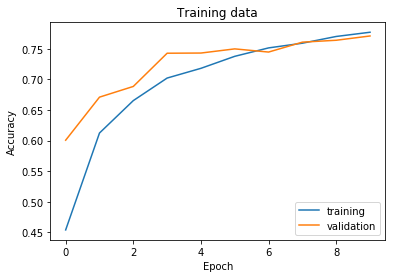

In [9]:
plt.clf()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training data')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'],loc='lower right')
plt.show()
plt.clf()

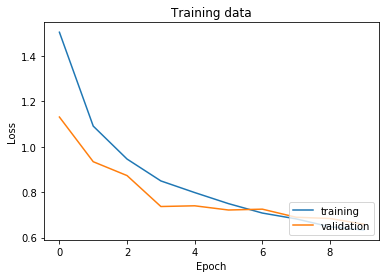

In [10]:
plt.clf()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training data')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'],loc='lower right')
plt.show()

In [11]:
predicted_classes=model.predict_classes(x_test[:1000])

In [12]:
predicted_classes

array([3, 8, 8, 0, 6, 6, 3, 2, 3, 1, 0, 9, 5, 7, 9, 8, 5, 7, 8, 6, 7, 0, 4,
       9, 4, 2, 4, 0, 9, 6, 6, 5, 2, 3, 9, 3, 4, 9, 9, 5, 4, 6, 7, 6, 0, 9,
       3, 3, 7, 2, 9, 8, 6, 6, 8, 8, 7, 3, 2, 3, 7, 5, 6, 3, 6, 6, 1, 2, 3,
       7, 0, 6, 8, 8, 0, 2, 0, 3, 5, 8, 8, 9, 1, 7, 2, 7, 2, 8, 8, 9, 0, 6,
       8, 6, 4, 6, 6, 0, 0, 3, 4, 5, 6, 3, 1, 1, 6, 6, 8, 7, 6, 0, 2, 2, 1,
       4, 0, 4, 6, 7, 8, 3, 1, 2, 8, 0, 0, 6, 3, 2, 2, 1, 8, 9, 1, 2, 9, 7,
       2, 0, 6, 5, 6, 5, 8, 7, 6, 6, 5, 3, 8, 9, 6, 0, 0, 6, 2, 9, 3, 4, 2,
       1, 6, 6, 0, 4, 8, 4, 4, 0, 9, 9, 9, 8, 9, 9, 3, 7, 5, 0, 0, 5, 2, 2,
       0, 8, 6, 2, 3, 8, 6, 8, 2, 1, 7, 5, 8, 8, 7, 8, 5, 9, 8, 7, 1, 3, 0,
       5, 7, 9, 5, 4, 5, 9, 8, 0, 7, 9, 0, 2, 7, 3, 9, 4, 4, 9, 3, 2, 3, 6,
       5, 1, 3, 8, 8, 0, 4, 9, 5, 3, 1, 1, 8, 9, 0, 6, 1, 8, 2, 0, 5, 3, 9,
       9, 2, 0, 6, 0, 0, 9, 8, 9, 3, 6, 0, 8, 2, 4, 7, 2, 2, 3, 6, 3, 8, 2,
       0, 2, 4, 5, 9, 0, 6, 1, 0, 9, 1, 0, 7, 9, 1, 2, 6, 1, 3, 2, 6, 0, 0,
       6, 6,

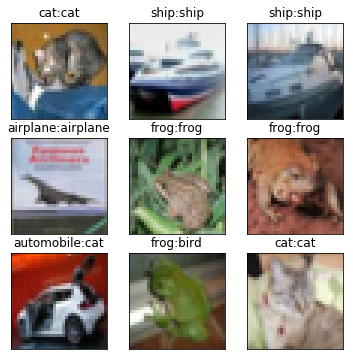

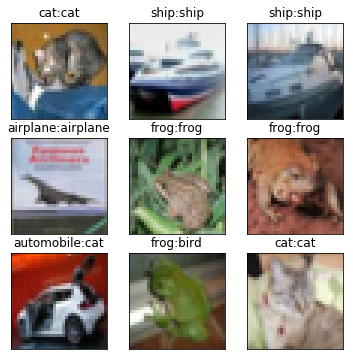

In [13]:
import numpy as np
fig=plt.figure()
fig.set_size_inches(6,6)
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i],cmap='binary')
    plt.title(image_dictionary[np.argmax(y_test[i])]+':'
              +image_dictionary[predicted_classes[i]])
    plt.xticks([])
    plt.yticks([])
    
fig

In [14]:
scores2 = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores2[0])
print('Test accuracy:', scores2[1])

10000/10000 [==============================] - 12s 1ms/step
Test loss: 0.659006468582
Test accuracy: 0.771
